Osnabrück University - Computer Vision (Winter Term 2024/25) - Dr. Ulf Krumnack, Lukas Niehaus, Robin Rawiel

# Exercise Sheet 02: Color & Basic Operators

## Introduction

This week's sheet should be solved and handed in before end of **Monday, November 25, 2023**. If you need help (and Google and other resources were not enough), use the StudIP forum. Please upload your results to your group's Stud.IP folder.

## Assignment 0: Math recap (Euclidean Space) [0 Points]

This exercise is supposed to be easy, does not give any points, and is voluntary.
There will be a similar exercise on following sheets.
It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them.
Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session.
Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What is a *Euclidean space*? What is the *Cartesian plane*? How are they usually denoted? How to write points in these spaces?

Euclidean space is used to represent n dimensional space. Cartesian plane is a specific instance of euclidean space in 2 dimension where every point can be identified by its x and y coordinate. Represented as R^2 Point P = (x,y) x=x coorndinate y =y coordinate

**b)** What is the *norm* of a vector in a Euclidean space? How to *add* and *substract* two vectors? How is the *Euclidean distance* defined? Are there other ways to measure distances?

Norm of a vector in euclidean space is measure of its length and magnitude. Ex for v1=(x1,y1) and v2=(x2,y2) sum=(x1+x2,y1+y2) difference=(x1-x2,y1-y2) Euclidean distance (straight line distance between two points) can be calculated in this space. Other ways - Manhattan, Minkowski distance

**c)** What is the (standard) *scalar product* of two vectors? How is it related to the length and angle between these vectors? Name some use cases.

Scalar product can be defined as v1.v2 = (x1x2,y1y2) It is related to angle and length as v1.v2 = |v1||v2|cosθ It is used in machine learning for identifying similarity.


## Assignment 1: Color perception and color spaces (4 points)

### a) Human color perception

Explain how human color perception works, that is, how light of different frequencies (and mixtures of different frequencies) is perceived as different colors.
Then discuss what light sources/frequencies could be used to induce the perception of the following colors?
* orange
* brown
* purple
* white

Light is an electromagnetic wave with different wavelengths defining its color. The human eye perceives it through three types of cones:

1. S-Cones: Responsible for short wavelengths (blue light)
2. M-Cones: Responsible for medium wavelengths (green light)
3. L-Cones: Responsible for long wavelengths (red light)
   
- Orange is a mixture of red and green light, with a higher contribution from red
- Brown is a mixture of R,G and B, with a higher percentage of red and generally a low saturation or intensity
- Purple is a mixture of blue and red light
- White is a mixture of all visible wavelengths at maximum intensity

### b) RGB and HSV color space

Compare the RGB and the HSV color spaces. Name advantages and discuss suitable applications for each of them.

The RGB and HSV color spaces describe colors from different perspectives. While in RGB, hue, saturation, and intensity are defined by the interaction of the intensities of red, green, and blue, the HSV color space works differently.

In HSV, color is defined by hue, saturation, and brightness (value), which aligns more closely with human color perception and understanding. This makes HSV particularly suitable for creative tasks. On the other hand, the RGB color space is less intuitive but is the preferred choice for devices like computer screens, as it is based on the additive color mixing model.

### c) Additive and subtractive color mixing

Explain the ideas of additive and subtractive color mixing. Name examples for each mixing model and describe technical applications.

#### Additive

Additive color mixing is based on the principle that light of different wavelengths can be combined to create new colors. When colors are added together, they combine to form other colors, and when all the primary colors of light are combined at full intensity, they create white light. The more colors of light that are added together, the brighter and more intense the resulting color becomes. A typical use case are computer screens or light projectors.

#### Subtractive

Subtractive color mixing occurs when light is absorbed by a medium (such as paint, ink, or filters), and only the light that is reflected or transmitted from the surface is perceived by the human eye. Subtractive mixing is often described as "removing" or subtracting certain wavelengths of light to create new colors. The primary colors here are Cyan, Magenta, and Yellow (CMY), which are the complementary colors of red, green, and blue. When you mix two subtractive colors, they absorb (subtract) certain wavelengths and reflect others, leading to new colors. When all three primary subtractive colors (CMY) are mixed together, they theoretically absorb all visible light, producing black. The technique is used e.g. in printing.

### d) 3D color cube

Plot the colors (red, green, blue, yellow, cyan, magenta, grey, black, white) from additive and subtractive color mixing in a 3D cube. 
Plot points on the corresponding locations and give them the appropriate color. 
Hint: to create the points you can use the *ax.scatter* function, where the *c* argument can take in multiple colors.

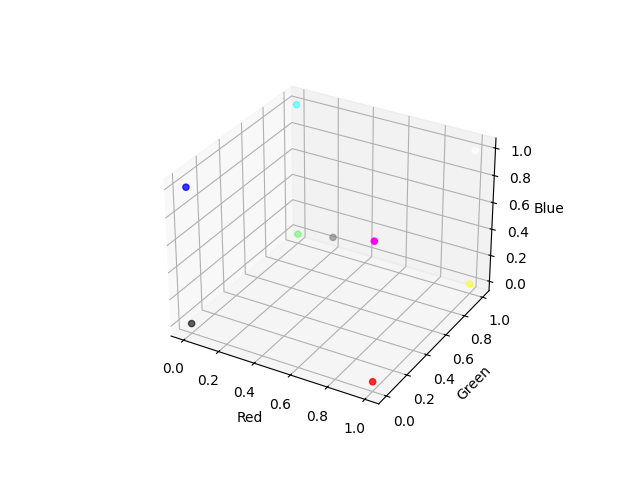

In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

colors = np.array([
    [1, 0, 0],  # Red
    [0, 1, 0],  # Green
    [0, 0, 1],  # Blue
    [0, 1, 1],  # Cyan 
    [1, 1, 0],  # Yellow
    [1, 0, 1],  # Magenta 
    [0.5, 0.5, 0.5],  # Grey
    [0, 0, 0],  # Black
    [1, 1, 1],  # White 
])

ax.scatter(colors[:, 0], colors[:, 1], colors[:, 2], c=colors) 

ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
plt.show()

## Assignment 2: Twodimensional Convolution (8 points)

This exercise is purely theoretical and does not require implementation.

### a) Definition

Describe in your own words how convolution works. Also provide the formula from the lecture and explain its idea.

#### Convolution: Local operator, linear, homogeneous

$$
\text{Defined by filter kernel (also called "mask")} \, k, \, \text{commonly of size } 3 \times 3, 5 \times 5, \ldots:
$$

$$
k(i,j) \in \mathbb{R}^{(2m+1)\times(2n+1)}, \, \text{with} \, m, n \in \mathbb{N}
$$

$$
\text{Result is calculated as the scalar product of } k \text{ and an image patch of corresponding size:}
$$

$$
g'(x, y) = (g * k)(x, y) = \sum_{i \in [-m,m]} \sum_{j \in [-n,n]} k(i + m, j + n) \cdot g(x + i, y + j)
$$

Convolution is a mathematical operation used to extract specific features from an input signal, such as an image. It involves computing the scalar (dot) product between a small matrix called the kernel (or filter) and local patches of the input signal. The kernel is typically a smaller matrix (e.g., 3x3, 5x5) with predefined values that highlight particular structures or patterns, such as edges, textures, or shapes. The resulting feature map emphasizes certain patterns or structures that the kernel was designed to detect and reduces redundant information.


### b) Properties
Is convolution linear or non-linear? Is it homogenous or inhomogenous? Use formulae and proof your answers. 

Hint:

From  CV-03 slide 49: A function $f$ is linear iff 
$f \left( a \cdot x \right) = a \cdot f \left( x \right) $
and
$f \left( x_1 + x_2 \right) = f \left( x_1 \right) + f \left( x_2 \right)$

A function is homogeneous if translating the filtered image is the same as filtering the translated image. I.e. $\operatorname{translate}(g\ast k,\Delta x,\Delta y)[x,y] = (\operatorname{translate}(g,\Delta x,\Delta y)\ast k)[x,y]$


### Linearity of Convolution:
Convolution is **linear** because it satisfies both homogeneity and additivity.

1. **Homogeneity**:
   $$
   f(a \cdot x) = a \cdot f(x)
   $$
   $$
   (a \cdot g) * k = a \cdot (g * k)
   $$

2. **Additivity**:
   $$
   f(x_1 + x_2) = f(x_1) + f(x_2)
   $$
   $$
   (g_1 + g_2) * k = (g_1 * k) + (g_2 * k)
   $$

### c) Complexity

Assume an image $g$ of size $M\times N$ and a kernel $k$ of size $(2m+1)\times(2n+1)$. How many operations (additions and multiplications) are required to compute a convoluted image $g\ast k$ (of the same size as $g$)?

- **Multiplications**: 
  $$
  M \times N \times (2m+1) \times (2n+1)
  $$

- **Additions**: 
  $$
  M \times N \times \left[ (2m+1) \times (2n+1) - 1 \right]
  $$

Thus, the total number of operations is:
$$
\text{Total Operations} = M \times N \times \left[ 2 \times (2m+1) \times (2n+1) - 1 \right]
$$


### d) Separability

What is a separable kernel? Describe, how it can be applied more efficiently. Compute the number of operations for getting $g\ast k$ (as in (c), but with a separable kernel $k$) and compare the results. Assume that the kernel is of size $m \times n$ and the image is of size $M \times N$. Compute the number of operations first for a single pixel and then extend your answer to the whole image. Ignore the normalization of the kernel, i.e. the fraction in front.

Note that here we define the kernel size as $m \times n$ as opposed to Assignment *c)*. This is a shorter notation.

A **separable kernel** is a kernel that can be factored into two smaller 1D kernels: $k_{\text{row}}$ of size $m \times 1$ and $k_{\text{col}}$ of size $1 \times n$, such that:
$$
k = k_{\text{row}} \cdot k_{\text{col}}^T
$$
This allows for more efficient computation.

### Number of Operations per Pixel:
For a separable kernel of size $m \times n$, the number of operations per pixel is:
- **Multiplications**: 
  $$
  m + n
  $$
- **Additions**: 
  $$
  (m - 1) + (n - 1)
  $$

### Total Number of Operations for the Whole Image:
For an image of size $M \times N$, the total number of operations is:
- **Multiplications**: 
  $$
  M \times N \times (m + n)
  $$
- **Additions**: 
  $$
  M \times N \times \left[ (m - 1) + (n - 1) \right]
  $$

This is much more efficient compared to the non-separable kernel, which requires $M \times N \times (m \times n)$ multiplications.



## Assignment 3: Applying Convolution (4 points)

In this exercise you will apply convolution with different kernels. You may use the function `scipy.ndimage.convolve` to solve this task. Check the documentation to learn how to use this function. In this assignment you do not have to implement the convolution yourself. Realize the following filters, describe their effect and possible applications.

### a) Box filter

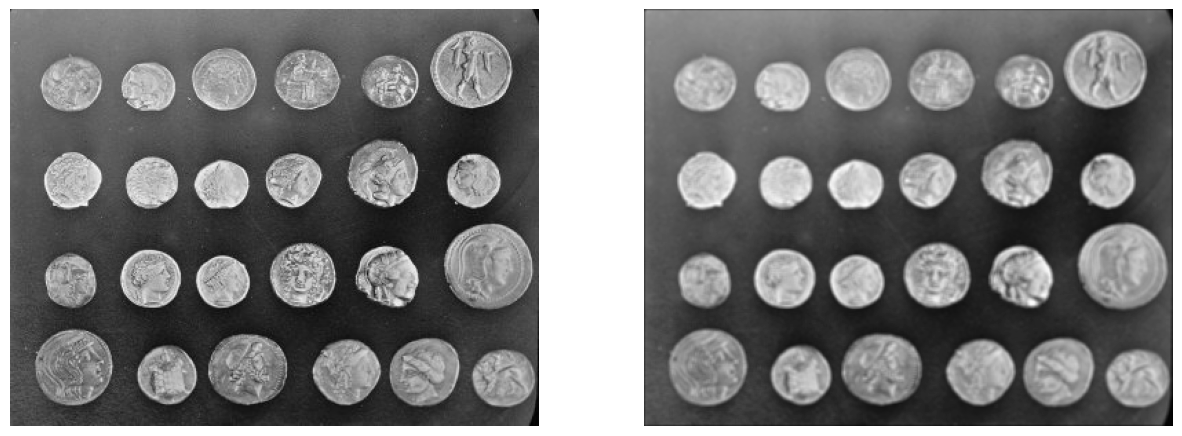

In [3]:
%matplotlib inline
import numpy as np
from imageio.v2 import imread
from skimage import data,color
from scipy.ndimage import convolve

image = data.coins().astype(np.float32)
k=np.ones((3,3))/9
filtered_image = convolve(image ,k,mode='constant', cval=0.0)


fig = plt.figure(figsize=(15,7))
a=fig.add_subplot(1,2,1)
plt.imshow(image, cmap = 'gray')
plt.axis('off')
a=fig.add_subplot(1,2,2)
plt.imshow(filtered_image, cmap = 'gray')
plt.axis('off')
plt.show()

### b) Gaussian filter

You may try different filter sizes.

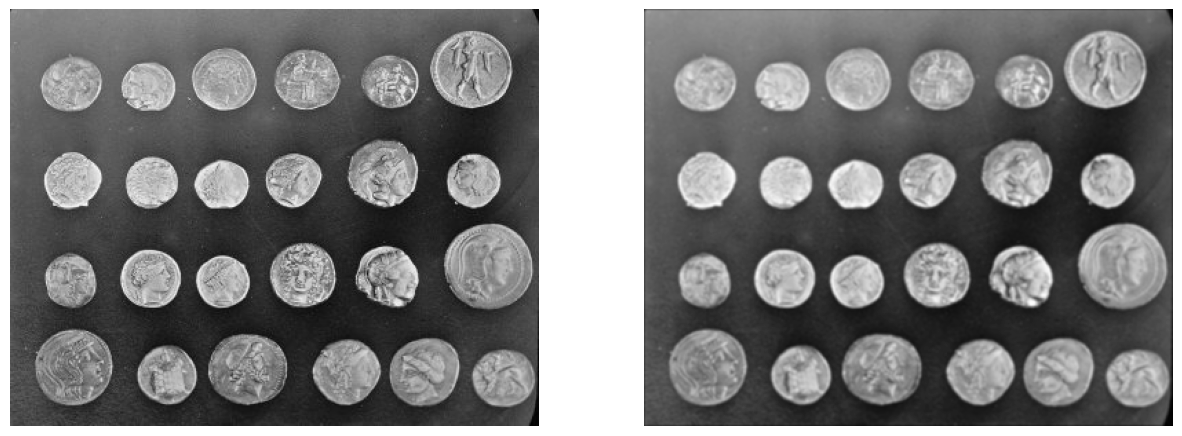

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from imageio.v2 import imread
from skimage import data

# Load an image
#image = imread('some_file.png', pilmode = 'F')
image = data.coins().astype(np.float32)

k=np.array([[1,2,1],[2,4,2],[1,2,1]])/16
filtered_image = convolve(image ,k,mode='constant', cval=0.0)
fig = plt.figure(figsize=(15,7))

a=fig.add_subplot(1,2,1)
plt.imshow(image, cmap = 'gray')
plt.axis('off')
a=fig.add_subplot(1,2,2)
plt.imshow(filtered_image, cmap = 'gray')
plt.axis('off')
plt.show()

### c) Sobel filter

Try horizontal, vertical, and diagonal sobel filters.

<Figure size 1500x700 with 0 Axes>

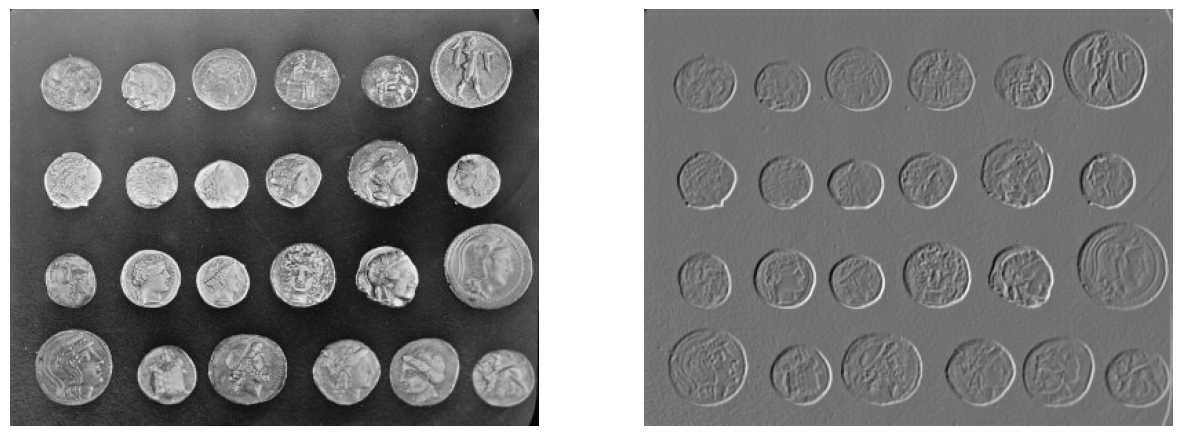

In [5]:
%matplotlib inline
def normalize(image):
    return (image - np.min(image)) / (np.max(image) - np.min(image))

image = data.coins().astype(np.float32)

k_x = np.array([[-1, 0, 1],
                [-2, 0, 2],
                [-1, 0, 1]])

k_y = np.array([[-1, -2, -1],
                [ 0,  0,  0],
                [ 1,  2,  1]])

k_d1 = np.array([[-2, -1,  0],
                 [-1,  0,  1],
                 [ 0,  1,  2]])

k_d2 = np.array([[ 0,  1,  2],
                 [-1,  0,  1],
                 [-2, -1,  0]])

grad_x = normalize(convolve(image, k_x) )
grad_y = normalize(convolve(image, k_y)  )
grad_d1 = normalize(convolve(image, k_d1) )
grad_d2 = normalize(convolve(image, k_d2)  )

filtered_image = np.sqrt(grad_x**2 + grad_y**2+grad_d1**2 + grad_d2**2)
fig = plt.figure(figsize=(15,7))

fig = plt.figure(figsize=(15,7))
a=fig.add_subplot(1,2,1)
plt.imshow(image, cmap = 'gray')
plt.axis('off')
a=fig.add_subplot(1,2,2)
plt.imshow(filtered_image, cmap = 'gray')
plt.axis('off')
plt.show()

### d) Unsharp Mask

One method to sharpen images is Unsharp Mask in which a negative unsharp mask is added to the original image as follows:

$$\text{Sharpened Image} = \text{Original Image} + (\text{Original Image} - \text{Unsharp Image}) \cdot \text{Amount}$$

The unsharp image can be computed by convolution with a Gaussian Kernel. Implement unsharp masking with a $5\times5$ Gaussian Kernel and a sharpening amount of $1.5$. Use the allready defined gaussian kernel "gauss_5".

Hint: To get good results the final images needs to be clipped to values between $0$ and $255$, i.e. all negative values are set to zero and all values bigger than $255$ are set to $255$.

You may experiment with large or negative sharpening amounts.

* Why is Unsharp Masking sharpening an image?
* What is the difference between normalizing and clipping an image?


Unsharp masking enhances edges and fine details in an image by emphasizing regions with high intensity differences. This is achieved by subtracting a blurred (unsharp) version of the image from the original image, isolating high-frequency components (edges). By amplifying these components and adding them back to the original image, the result appears sharper.


Normalizing:

Scales the image values to a specific range, such as [0, 1] or [0, 255], while preserving proportionality between pixel intensities.

Often used for machine learning, histogram equalization, or to ensure uniform brightness levels.

Example: Dividing all pixel values by the maximum intensity.

Clipping:

Truncates pixel values that fall outside a specified range, setting negative values to 0 and values above the maximum (e.g., 255) to the maximum value.

Used to avoid overflows or invalid pixel intensities in image processing.

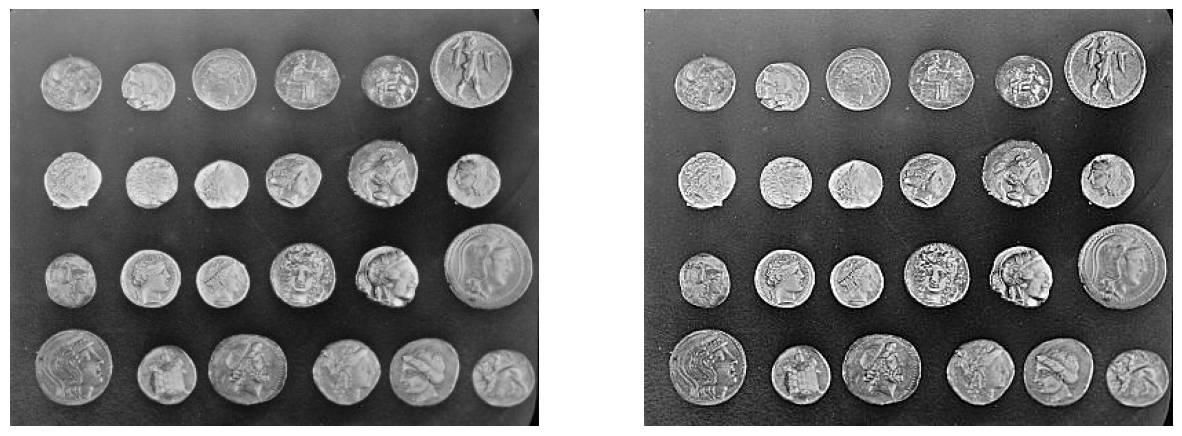

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from imageio.v2 import imread
from skimage import data

# Load an image
#image = imread('some_file.png.jpg', mode='F')
image = data.coins().astype(np.float32)

# Define sharpening amount
amount = 1.5

# Define the filters:
gauss_5 = 1/256 * np.asarray([[1,4,6,4,1],[4,16,24,16,4],[6,24,36,24,6],[4,16,24,16,4],[1,4,6,4,1]])

unsharped_mask_image = convolve(image, gauss_5)
sharped_image = np.clip(image+(image-unsharped_mask_image)*amount,0,255)

fig = plt.figure(figsize=(15,7))
a=fig.add_subplot(1,2,1)
plt.imshow(image, cmap = 'gray')
plt.axis('off')
a=fig.add_subplot(1,2,2)
plt.imshow(sharped_image, cmap = 'gray')
plt.axis('off')
plt.show()

## Assignment 4: Implementing Convolution (4 points)

Now implement your own 2-dimensional convolution function. The function should take an image and a kernel as arguments and return an image of the same size, containing the result of convolving the image with the kernel.

**(a)** First: you may notice a problem at the boundaries of the image. Describe the problem and possible solutions. Implement at least one of them in (b).

When considering the pixels at the boundary, they do not have sufficient neighbours on all the 4 sides - which is required while calculating scalar product. Possible solutions:

- Ignore the boundaries: this leads to loss of information.
- Add padding: 0 or constant gray values can be padded on all the sides.
- Replicate Padding: Extend the image by replicating the pixel values at the borders.
- Reflect Padding: Reflect the image pixels at the edges to create a mirrored effect.
tdes

**(b)** Now implement your function. Apply it with different kernels and compare the results with the output of the library function `scipy.ndimage.correlate` (bonus question: why not `scipy.ndimage.convolve`?).

(303, 384)
(303, 384)
(303, 384)
(303, 384)


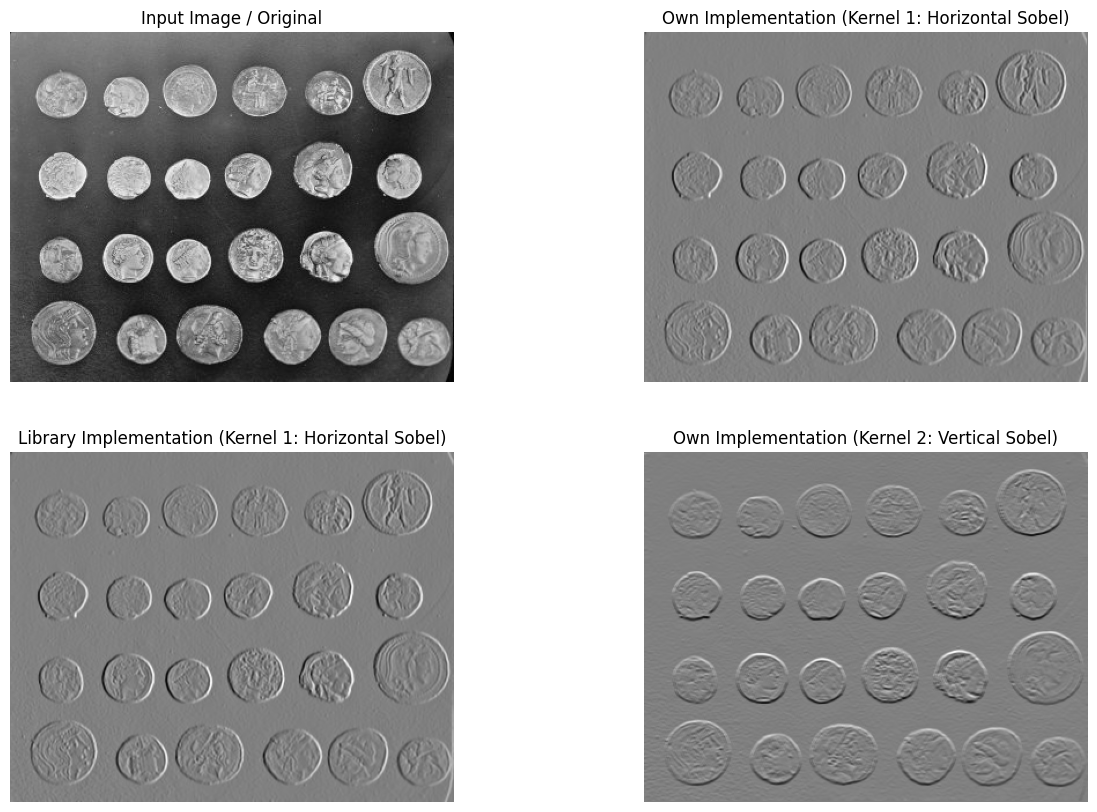

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import imageio.v3 as iio
import scipy.ndimage

def my_convolve2d(img, kern, flip=False):
    """Convolve an image with a kernel.

    Args:
        img (np.ndarray): The image, provided as a two-dimensional array.
        kern (np.ndarray): The kernel, also a two-dimensional array.
        flip (bool): If True, flips the kernel for convolution (default: False).
        
    Returns:
        result (np.ndarray): The convolved image. 
        
    """
    # Kernel size and half-size
    m, n = kern.shape
    mh, nh = m // 2, n // 2
    
    # Pad the image to maintain the output size
    img_padded = np.pad(img, pad_width=((mh, mh), (nh, nh)), mode='reflect')
    
    # Get padded image size
    M_padded, N_padded = img_padded.shape
    
    # Original image size
    M, N = img.shape  # Do not use the padded size here
    
    # Flip the kernel if required
    kern = np.flip(kern, axis=(0, 1)) if flip else kern

    # Create sliding windows
    windows = np.lib.stride_tricks.as_strided(
        img_padded,
        shape=(M, N, m, n),  # Use original image size to determine window count
        strides=(img_padded.strides[0], img_padded.strides[1], img_padded.strides[0], img_padded.strides[1]) # Stride is 1 here
    )
    
    # Perform convolution
    result = np.tensordot(windows, kern, axes=((2, 3), (0, 1)))
    print(img.shape)
    print(result.shape)
    return result


image = iio.imread("imageio:coins.png").astype(np.float32)

# Define two kernels 
kernel1 = 1/4 * np.asarray([[1, 0, -1], [2, 0, -2], [1, 0, -1]])  # Sobel operator (horizontal edges)
kernel2 = np.asarray([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])  # Sobel operator (vertical edges)


fig = plt.figure(figsize=(15, 10))

# Show the original image
fig.add_subplot(2, 2, 1)
plt.title("Input Image / Original")
plt.imshow(image, cmap='gray')
plt.axis('off')

fig.add_subplot(2, 2, 2)
plt.title("Own Implementation (Kernel 1: Horizontal Sobel)")
plt.imshow(my_convolve2d(image, kernel1), cmap='gray')
plt.axis('off')

fig.add_subplot(2, 2, 3)
plt.title("Library Implementation (Kernel 1: Horizontal Sobel)")
plt.imshow(scipy.ndimage.correlate(image, kernel1), cmap='gray')
plt.axis('off')

fig.add_subplot(2, 2, 4)
plt.title("Own Implementation (Kernel 2: Vertical Sobel)")
plt.imshow(my_convolve2d(image, kernel2), cmap='gray')
plt.axis('off')

# Show the result
plt.show()

We use scipy.ndimage.correlate because it aligns with the behavior of the my_convolve2d implementation, which does not flip the kernel. The function was implemented using the formula:

$$
g'(x, y) = (g * k)(x, y) = \sum_{i \in [-m,m]} \sum_{j \in [-n,n]} k(i + m, j + n) \cdot g(x + i, y + j)
$$

with

$$
k(i,j) \in \mathbb{R}^{(2m+1)\times(2n+1)}, \, \text{with} \, m, n \in \mathbb{N}
$$

Using real convolution, the formula must be written as follows:

$$
g'(x, y) = (g * k)(x, y) = \sum_{i \in [-m, m]} \sum_{j \in [-n, n]} k(-i + m, -j + n) \cdot g(x + i, y + j)
$$
